# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Riccardo Beccaria - Luglio 2021</span>

# <span style="color:green"> Esercitazione 6<span>

### Esercizio 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.
as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

Il codice simula un modello di Ising monodimensionale. Il modello di Ising è un modello statistico per descrivere un sistema di N spin che obbediscono all'hamiltoniana:

$$ H = -J\sum_{i=1}^N s_i s_{i+1} -\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1})$$

dove $s_i=\pm 1$ e $s_{N+1}=s_1$. Nel nostro caso in particolare consideriamo un modello ferromagnetico $J>0$. Questo significa che gli spin tendono ad allinearsi per minimizzare l'energia del sistema. Il termine $h$ invece rappresenta il campo magnetico esterno, che lasceremo spento ad eccezione di quando vengono compiute misure sulla Magnetizzazione del sistema.
Il modello di Ising, è un modello interessante da studiare in quanto è possibile scrivere in maniera esatta la funzione di partizione del sistema (cosa molto difficile per la maggioranza dei sistemi statistici). Infatti:

$$ Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N\ $$

dove
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
e dove $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
La conoscenza della funzione di partizione, permette di scrivere in maniera esatta alcune proprietà del sistema che nel corso dell'esercitazione verranno graficate con delle linee blu.

Lo scopo di questa esercitazione è quello di simulare un sistema di 50 spin monodimensionale, e confrontare i valori analitici di queste proprietà, con i valori che si ottengono tramite simulazioni Monte Carlo. Ho implementato nell'algoritmo due modi per far evolvere il sistema:

1. <font color="red">L'Algoritmo di Metropolis</font> è il primo modo per far evolvere il sistema di 50 spins. Il funzionamento dell'algoritmo di Metropolis è stato già illustrato nella quinta esercitazione quindi non mi prolungherò a rispiegare il funzionamento. L'unica accortezza è che, in questo caso, la mossa tentativa dell'Algoritmo è quella di invertire il segno di uno spin preso casualmente tra i 50 spin del sistema (il così detto *flip*). Anche in questo caso questa probabilità tentativa è simmestrica Mentre la probabilità di accettazione sarà il minimo tra uno e il rapporto delle probabilità di Boltzmann delle due configurazioni: $A(x|y)=min(1, e^{-\beta(E'-E)})$. Dove $E'$ è l'energia della nuova configurazione in cui il metodo sta tentando di andare. In ogni singola mossa, il tutto viene ripetuto per tante volte quanti sono gli spin del sistema.
2. Il secondo modo di far evolvere il sistema è attraverso <font color="red">L'Algoritmo di Gibbs</font>. A differenza dell'algoritmo di Metropolis, quello di Gibbs non propone una mossa e la accetta con una qualche probabilità, ma semplicemente la compie. L'idea è che dato un sistema con un certo numero di gradi di libertà, ne sceglie casualmente uno (tenendo fissi tutti gli altri) ed campiona quel grado di libertà scelto con la probabilità condizionale: $p(x_1|x_2,...,x_N)$. Nel caso del modello di Ising monodimensionale questo ragionamento appena illustrato si traduce nello scegliere casualmente uno spin e assegnargli il valore $+1$ con una probabilità data da $A = \min(1, \frac{1}{1+e^{-\beta(E_{down}-E_{up})}})$, altrimenti viene assegnato il valore $-1$ allo spin selezionato.

Le grandezze calcolate in questa simulazione Monte Carlo sono: 
1. L'energia interna del sistema $U(N,T) = \langle H \rangle_{h=0}$
2. La capacità termica del sistema $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. La suscettibilità del sistema $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. La magnetizzazione del sistema $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Innanzitutto, la prima cosa fatta è stata quella di implementare nell'algoritmo la possibilità di ripartire da una configurazione finale precedentemente salvata nel file <font face="Courier">config.final</font>. Per utilizzare questa opzione è necessario porre la variabile `restart`=1 nel file <font face="Courier">input.dat</font> dato in ingresso all'algoritmo. Al suo interno, il file <font face="Courier">input.dat</font> contiene anche altre variabili necessarie per la conduzione della simulazione, quali:
- metro=1 se si vuole campionare con l'algoritmo di Metropolis, =0 se si vuole campionare con Gibbs
- J posto =1 per far sì che il sistema fosse ferromagnetico
- il numero di spin del sistema
- h valore del campo magnetico esterno
- numero di blocchi e numero di passi per ciascun blocco

#### Equilibrazione

Da ultimo, prima di procedere nella vera e propria simulazione per calcolare le quantità ricercate, il sistema necessita dell'equilibrazione. Nel mio caso ho deciso di condurre l'equilibrazione facendo compiere al sistema $10^4$ mosse suddivise in 100 blocchi. Il motivo di questa scelta è che come riportato nel grafico sottostante, questo numero di estrazioni è sufficiente per osservare una buona convergenza del sistema a una certa energia. Così, una volta equilibrato il sistema, la simulazione inizia prendendo l'ultima configurazione dell'equilibrazione, avendo così 50 spin già equilibrati alla data temperatura.
Ho riportato l'andamento dell'energia in funzione dei blocchi per un fattore puramente estetico. Infatti graficando l'energia istantanea non si riusciva ad apprezzare bene le piccole oscillazioni del sistema attorno a un valore fisso di energia.

Ho riportato in figura l'equilibrazione del sistema alla temeperatura di $T=1.5$, campionando le diverse conformazioni attraverso l'algoritmo di Metropolis.

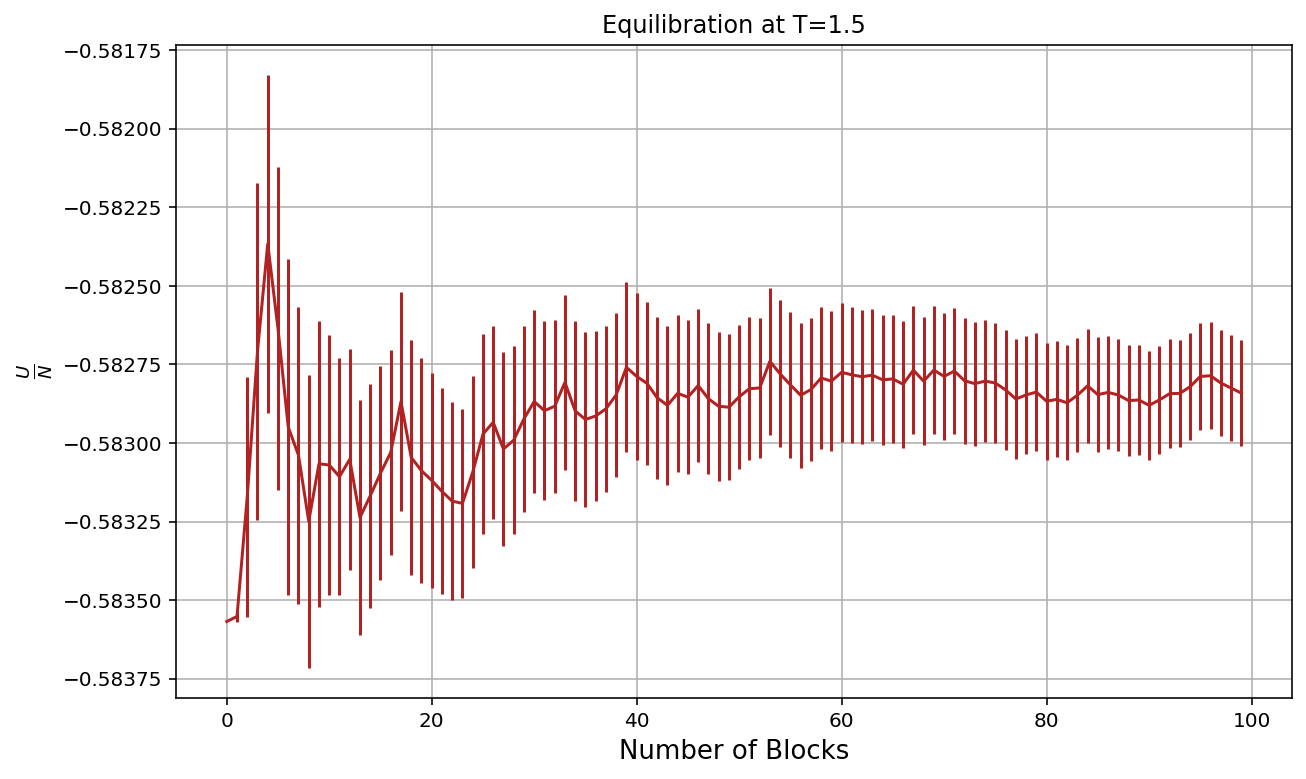

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'
U,error = np.loadtxt("./06.1/ISING_1D/Equilibration_Metro.txt", usecols=(0,2), delimiter=' ', unpack='true')
x = np.arange(100)



plt.figure(figsize=(10,6))
plt.errorbar(x, U, yerr=error, color='firebrick')
plt.title("Equilibration at T=1.5")
plt.xlabel('Number of Blocks', fontsize=13)
plt.ylabel(r'$\frac{U}{N}$', fontsize=13)


plt.grid()
plt.show()

#### Misura delle proprietà termodinamiche del sistema in funzione della temperatura T

Una volta equilibrato il sistema è stato possibile condurre la vera e propria simulazione. Ho implementato nel codice la possibilità di calcolare le quantità termodinamiche richieste attraverso il metodo del Data Blocking. Ad ogni step della simulazione, dopo il tentativo di mossa del sistema con l'algoritmo di Metropolis o Gibbs richiamato con la funzione `Move()`, vengono misurate le quattro quantità di energia interna, suscettibilità, cappacità termica e magnetizzazione attraverso la funzione `Measure()`. Una volta misurate queste quantità, viene richiamata la funzione `Accumulate()` per appunto accumulare tutte le misure che sono avvenute in un singolo blocco. Alla termine del blocco si richiama la funzione `Averages` per mediare le misure sul singolo blocco, e a sua volta ottenere la media progressiva delle quantità termodinamiche considerando le osservazioni dei blocchi precedenti. Quando viene raggiunto l'ultimo blocco vengono stampati in dei file di output la media progressiva totale dei 20 blocchi, con le relative incertezze.

Ho riportato nei grafici sottostanti, le misure da me ottenute. Le ho inoltre confrontate con i valori teorici attesi.
Ho utilizzato il metodo di data Blocking con 20 blocchi dove in ciascuno vengono eseguiti 10000 steps.

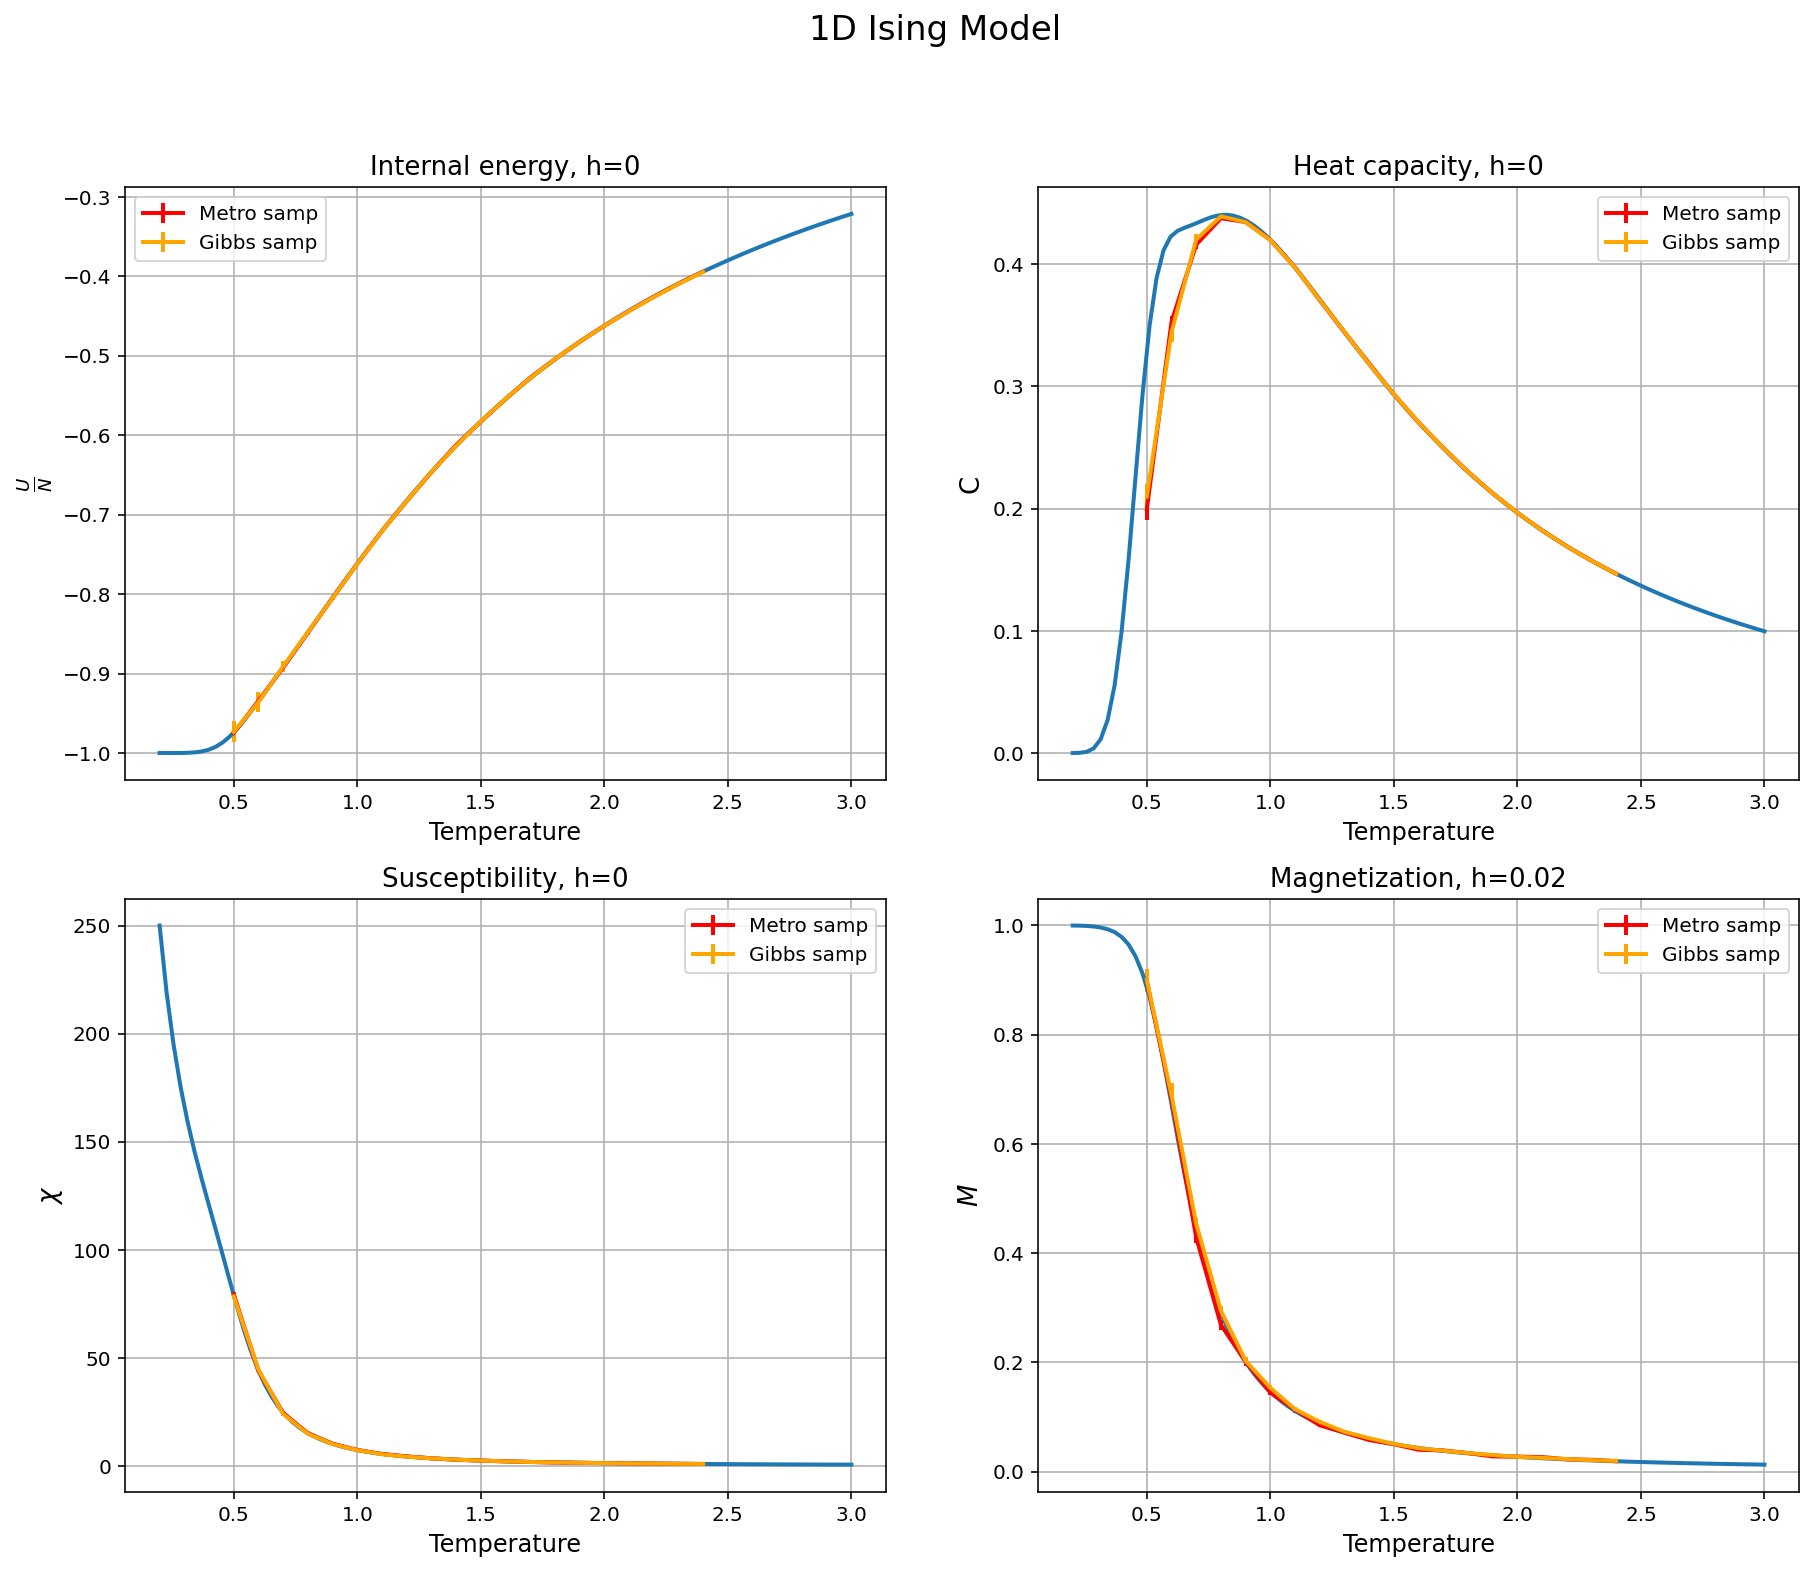

<Figure size 1440x720 with 0 Axes>

In [2]:
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

fig, axs = plt.subplots(2, 2, figsize=(15,12))
plt.suptitle('1D Ising Model', fontsize=17)

t,U, err_M = np.loadtxt("./06.1/ISING_1D/Myfinalfile_ene_Metro.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
t_G,U_G, err_G = np.loadtxt("./06.1/ISING_1D/Myfinalfile_ene_Gibbs.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
axs[0][0].plot(T, e, linewidth=2)
axs[0][0].errorbar(t,U,yerr=err_M, label='Metro samp',linewidth=2, color='red')
axs[0][0].errorbar(t_G,U_G, yerr=err_G, label='Gibbs samp', linewidth=2, color='orange')
axs[0][0].set_ylabel(r'$\frac{U}{N}$', fontsize=13)
axs[0][0].set_title('Internal energy, h=0', fontsize=13)


heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
t,Heat, err_M = np.loadtxt("./06.1/ISING_1D/Myfinalfile_heat_Metro.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
t_G,Heat_G, err_G = np.loadtxt("./06.1/ISING_1D/Myfinalfile_heat_Gibbs.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
axs[0][1].plot(T, heat,linewidth=2)
axs[0][1].errorbar(t,Heat,yerr=err_M, label='Metro samp',linewidth=2, color='red')
axs[0][1].errorbar(t_G,Heat_G, yerr=err_G, label='Gibbs samp', linewidth=2, color='orange')
axs[0][1].set_ylabel(r'C', fontsize=13)
axs[0][1].set_title('Heat capacity, h=0', fontsize=13)


X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
t,Chi, err_M = np.loadtxt("./06.1/ISING_1D/Myfinalfile_susceptibility_Metro.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
t_G,Chi_G, err_G = np.loadtxt("./06.1/ISING_1D/Myfinalfile_susceptibility_Gibbs.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
axs[1][0].plot(T, X,linewidth=2)
axs[1][0].errorbar(t,Chi, yerr=err_M, label='Metro samp',linewidth=2, color='red')
axs[1][0].errorbar(t_G,Chi_G, yerr=err_G, label='Gibbs samp', linewidth=2, color='orange')
axs[1][0].set_ylabel(r'$\chi$', fontsize=13)
axs[1][0].set_title('Susceptibility, h=0', fontsize=13)


h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.figure(figsize=(20,10))
t,M_M, err_M = np.loadtxt("./06.1/ISING_1D/Myfinalfile_magnetization_Metro.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
t_G,M_G, err_G = np.loadtxt("./06.1/ISING_1D/Myfinalfile_magnetization_Gibbs.txt", usecols=(0,1,2), delimiter=' ', unpack='true')

axs[1][1].plot(T, M,linewidth=2)
axs[1][1].errorbar(t,M_M, yerr=err_M, label='Metro samp',linewidth=2, color='red')
axs[1][1].errorbar(t_G,M_G, yerr=err_G,label='Gibbs samp', linewidth=2, color='orange')
axs[1][1].set_ylabel(r'$M$', fontsize=13)
axs[1][1].set_title('Magnetization, h=0.02', fontsize=13)

for ax in axs.flat:
    ax.set_xlabel('Temperature', fontsize=12)
    ax.grid(True)
    ax.legend()


Questi grafici mostrano un accordo quasi perfetto tra le quantità attese e le quantità simulate.